In [111]:
import sys
import os

# Add the parent directory to sys.path
parent_dir = os.path.abspath('..')
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)
import pyssr # SSR module 
from tqdm import tqdm 
import numpy as np 
from scipy.stats import gamma
import matplotlib.pyplot as plt 
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [ ]:
# Computing the distrubution of the avalanche size 
seed= 42
n_iter = int(3E3)
n_states = int(1E4)
mu = 2.0
simulation = pyssr.SSR(seed)
avalanche_sizes = np.zeros((n_iter))
for i in tqdm(range(n_iter)):
    path = simulation.ssr_casc(n_states, mu) 
    avalanche_sizes[i] = len(path) 

 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████                                        | 2195/3000 [00:41<00:14, 54.50it/s]

In [90]:
n_states = [200, 400, 600, 800]
mus = np.linspace(1.5, 3.5, 20).round(1)
n_iter = 3000


av_avalanche_sizes = []
for N in n_states:
    av_avalanche_s = []
    print(f"\rN = {N}")
    print("")
    for mu in mus:
        print(f"\rmu = {mu}", end='', flush=True)
        sizes = np.zeros(n_iter)
        for j in range(n_iter):
            path = simulation.ssr_casc(N, mu)
            sizes[j] = len(path)
        av_avalanche_s.append(sizes.mean())
    av_avalanche_sizes.append(av_avalanche_s)

N = 200
N = 4005
N = 6005
N = 8005
mu = 3.5

In [1]:
plt.scatter(mus, av_avalanche_sizes[0])
plt.scatter(mus, av_avalanche_sizes[1])
plt.scatter(mus, av_avalanche_sizes[2])
plt.scatter(mus, av_avalanche_sizes[3])
plt.xscale("log")
plt.yscale("log")
plt.show()

NameError: name 'plt' is not defined

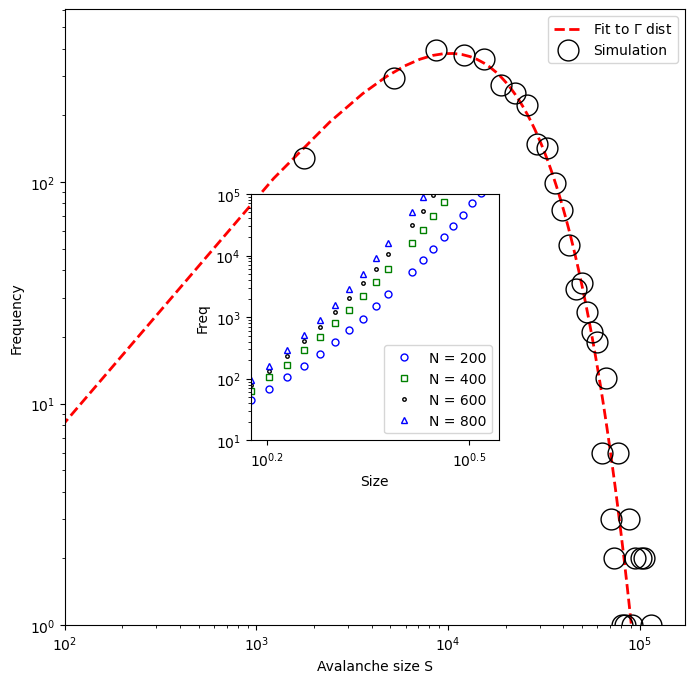

In [110]:
# Marker and colors for the inner figure 
from matplotlib.ticker import NullFormatter, FixedLocator

markers = ["o", "s", ".", "^"]
colors = ["blue", "green", "black", "blue"]
xticks = [10**0.2, 10**0.5]
xtick_labels = [r'$10^{0.2}$', r'$10^{0.5}$']

counts, bin_edges = np.histogram(avalanche_sizes, bins=34, density=False)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
bin_width = bin_edges[1] - bin_edges[0]

shape, loc, scale = gamma.fit(avalanche_sizes, floc=0)

# Gamma PDF scaled to counts scale
x = np.linspace(min(avalanche_sizes), max(avalanche_sizes), 100)
pdf = gamma.pdf(x, shape, loc=loc, scale=scale)
scaled_pdf = pdf * len(avalanche_sizes) * bin_width

fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(x, scaled_pdf, 'r--', linewidth=2, label=r'Fit to $\Gamma$ dist')
ax.plot(bin_centers, counts, linestyle='None',
        marker='o', markerfacecolor='none', markersize=15,
        markeredgecolor='black', label='Simulation')

ax.set_ylabel("Frequency")
ax.set_xlabel("Avalanche size S")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim(1E2, )
ax.set_ylim(1E0, )
ax.legend(loc="best")

ax_inset = inset_axes(ax, width="40%", height="40%", loc='center')

for i, N in enumerate(n_states): 
    ax_inset.plot(mus, av_avalanche_sizes[i],
              linestyle='None',
              marker=markers[i],
              color=colors[i],
              markerfacecolor='none',
              markeredgecolor=colors[i],
              markersize=5,
              label=f"N = {N}")
ax_inset.set_xscale('log')
ax_inset.set_yscale('log')
ax_inset.set_title("")
ax_inset.set_ylim(1E1, 1E5)
ax_inset.set_xlim(mus[0], mus[-1])
ax_inset.set_xticks(xticks, xtick_labels)

ax_inset.set_xlabel("Size")
ax_inset.set_ylabel("Freq")
axis = plt.gca()
axis.xaxis.set_minor_locator(FixedLocator([]))
axis.xaxis.set_minor_formatter(NullFormatter())

ax_inset.legend()

plt.show()

(59915394,)

In [9]:
state_vists

[6, 5, 4, 3, 2, 1]